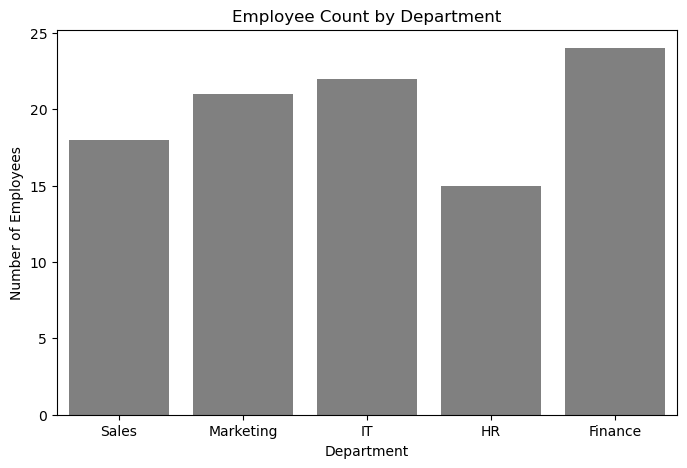

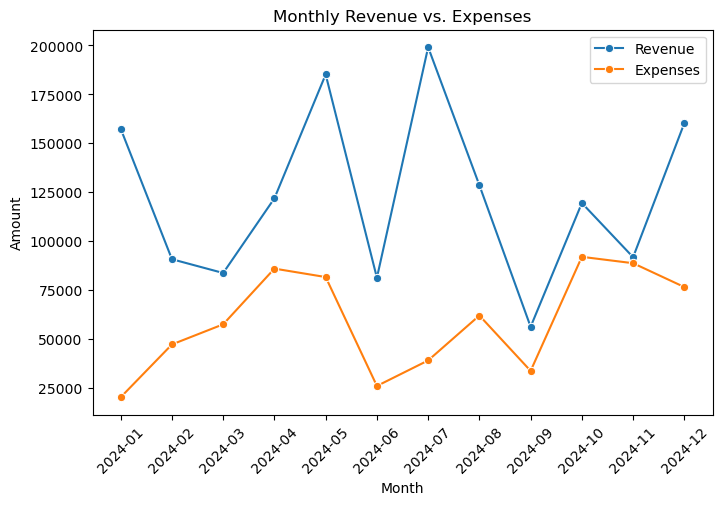

C:\Users\123\AppData\Local\Temp\ipykernel_9548\961993241.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Product Name", y="Revenue", palette="viridis")


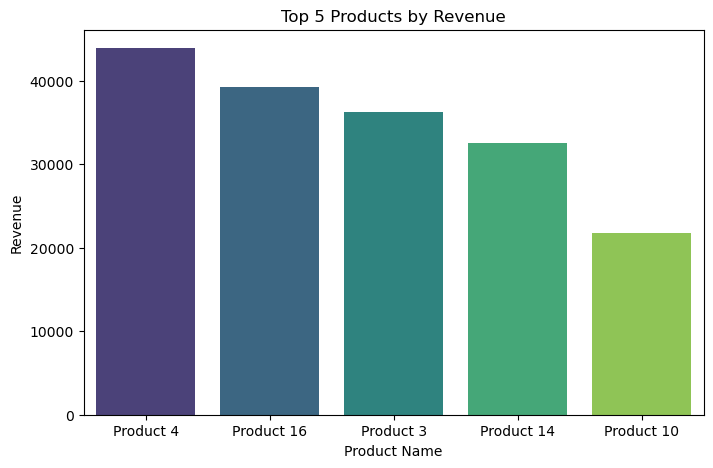

Generated all datasets and visualizations. Data saved to CSV files.


In [3]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker
fake = Faker()

# Number of Records
num_employees = 100
num_months = 12
num_products = 20

# Departments and Products
departments = ["HR", "Sales", "IT", "Finance", "Marketing"]
products = [f"Product {i}" for i in range(1, num_products + 1)]

# Generate Employee Data
employees = []
for emp_id in range(1, num_employees + 1):
    department = random.choice(departments)
    employees.append({
        "Employee ID": emp_id,
        "Name": fake.name(),
        "Department": department,
        "Position": fake.job(),
        "Salary": random.randint(30000, 100000),
        "Date of Joining": fake.date_this_decade().strftime("%Y-%m-%d"),
    })

# Generate Department Data
departments_data = []
for dept_id, dept_name in enumerate(departments, start=1):
    dept_employees = sum(emp["Department"] == dept_name for emp in employees)
    departments_data.append({
        "Department ID": dept_id,
        "Department Name": dept_name,
        "Number of Employees": dept_employees,
    })

# Generate Revenue Data
revenue_data = []
for month in range(1, num_months + 1):
    total_revenue = random.randint(50000, 200000)
    expenses = random.randint(20000, 100000)
    profit = total_revenue - expenses
    revenue_data.append({
        "Month": f"2024-{month:02d}",
        "Total Revenue": total_revenue,
        "Expenses": expenses,
        "Profit": profit,
    })

# Generate Product Sales Data
sales_data = []
for product in products:
    units_sold = random.randint(50, 500)
    price = random.uniform(10, 100)
    revenue = units_sold * price
    sales_data.append({
        "Product Name": product,
        "Units Sold": units_sold,
        "Price": round(price, 2),
        "Revenue": round(revenue, 2),
    })

# Create DataFrames
employees_df = pd.DataFrame(employees)
departments_df = pd.DataFrame(departments_data)
revenue_df = pd.DataFrame(revenue_data)
sales_df = pd.DataFrame(sales_data)

# Save to CSV
employees_df.to_csv("employees.csv", index=False)
departments_df.to_csv("departments.csv", index=False)
revenue_df.to_csv("revenue.csv", index=False)
sales_df.to_csv("product_sales.csv", index=False)

# Visualizations

# 1. Employee Count by Department
plt.figure(figsize=(8, 5))
sns.countplot(data=employees_df, x="Department", color="gray")
plt.title("Employee Count by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


# 2. Revenue vs. Expenses Trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=revenue_df, x="Month", y="Total Revenue", label="Revenue", marker="o")
sns.lineplot(data=revenue_df, x="Month", y="Expenses", label="Expenses", marker="o")
plt.title("Monthly Revenue vs. Expenses")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 3. Top 5 Products by Revenue
top_products = sales_df.nlargest(5, "Revenue")
plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x="Product Name", y="Revenue", palette="viridis")
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.show()

# Print Completion Message
print("Generated all datasets and visualizations. Data saved to CSV files.")
